# Étape 1 : Chargement et aperçu des données

In [4]:
import pandas as pd

# 🔸 1. Charger le dataset à partir du fichier CSV
df = pd.read_csv("test.csv")  # Remplace "nom_du_fichier.csv" par le vrai nom

# 🔸 2. Afficher les premières lignes pour voir à quoi ça ressemble
print(df.head())

# 🔸 3. Avoir un résumé de la structure (colonnes, types, valeurs manquantes)
print("\nRésumé du dataset :")
print(df.info())

# 🔸 4. Compter les valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# 🔸 5. Taille du dataset
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

## Résumé rapide de l’état des données

| Point                           | Détail |
|--------------------------------|--------|
| Nombre de lignes                | 25 976 |
| Nombre de colonnes              | 25 |
| Valeurs manquantes              | 83 valeurs manquantes dans `Arrival Delay in Minutes` |
| Variable cible                  | `satisfaction` (binaire : `"satisfied"` ou `"neutral or dissatisfied"`) |
| Variables quantitatives         | `Age`, `Flight Distance`, toutes les notes de services, les délais (`delays`) |
| Variables qualitatives          | `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction` |
| Colonnes inutiles à supprimer  | `Unnamed: 0` et `id` (elles ne servent pas à l’analyse) |


# Étape 2 : Nettoyage des données

In [5]:
# 🔸 Supprimer les colonnes inutiles
df_clean = df.drop(columns=["Unnamed: 0", "id"])

# 🔸 Supprimer les lignes où il manque "Arrival Delay in Minutes"
#    (ou remplacer par la moyenne si tu préfères)
df_clean = df_clean.dropna(subset=["Arrival Delay in Minutes"])

# 🔸 Vérification après nettoyage
print(f"Nombre de lignes après nettoyage : {df_clean.shape[0]}")
print(f"Valeurs manquantes restantes :\n{df_clean.isnull().sum().sum()}")

# Optionnel : réinitialiser les index après suppression
df_clean = df_clean.reset_index(drop=True)


Nombre de lignes après nettoyage : 25893
Valeurs manquantes restantes :
0


Le dataset est maintenant propre et prêt à l’analyse :

* On a supprimer les colonnes inutiles
* On a supprimer les lignes avec valeurs manquantes
* Obtenir un jeu de données final avec 25 893 lignes

# Étape 3 : Analyse univariée des variables

On va regarder :

* Les variables quantitatives : stats descriptives, distributions

* Les variables qualitatives : fréquences, répartition

1. **Variables quantitatives : stats descriptives**

In [6]:
# Liste des variables quantitatives
quant_vars = [
    "Age", "Flight Distance", "Inflight wifi service",
    "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service",
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

# 🔹 Statistiques descriptives
print(df_clean[quant_vars].describe())


                Age  Flight Distance  Inflight wifi service  \
count  25893.000000     25893.000000           25893.000000   
mean      39.621983      1193.753254               2.723709   
std       15.134224       998.626779               1.334711   
min        7.000000        31.000000               0.000000   
25%       27.000000       414.000000               2.000000   
50%       40.000000       849.000000               3.000000   
75%       51.000000      1744.000000               4.000000   
max       85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       25893.000000            25893.000000   
mean                            3.046422                2.755996   
std                             1.532971                1.412552   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                     

2. **Variables qualitatives : distribution des catégories**





In [7]:
# Liste des variables qualitatives
qual_vars = ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]

# 🔹 Fréquences de chaque catégorie
for col in qual_vars:
    print(f"\n{col} :")
    print(df_clean[col].value_counts())



Gender :
Gender
Female    13127
Male      12766
Name: count, dtype: int64

Customer Type :
Customer Type
Loyal Customer       21111
disloyal Customer     4782
Name: count, dtype: int64

Type of Travel :
Type of Travel
Business travel    17980
Personal Travel     7913
Name: count, dtype: int64

Class :
Class
Business    12457
Eco         11524
Eco Plus     1912
Name: count, dtype: int64

satisfaction :
satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


## Analyse des variables qualitatives

| Variable        | Répartition (principale observation) |
|----------------|----------------------------------------|
| Gender          | Quasiment équilibré (51% femmes, 49% hommes) |
| Customer Type   | Environ 81% de clients fidèles |
| Type of Travel  | Environ 69% voyagent pour affaires |
| Class           | Répartition relativement équilibrée, avec une dominance de la classe Business (48%) |
| Satisfaction    | 44% de clients satisfaits, 56% non satisfaits |


# statistiques descriptives de toutes les variables

In [8]:
df_clean[quant_vars].describe().T.round(2)  # .T pour transposer le tableau, .round(2) pour arrondir


,count,mean,std,min,25%,50%,75%,max
Age,25893.0,39.62,15.13,7.0,27.0,40.0,51.0,85.0
Flight Distance,25893.0,1193.75,998.63,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25893.0,2.72,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25893.0,3.05,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25893.0,2.76,1.41,0.0,2.0,3.0,4.0,5.0
Gate location,25893.0,2.98,1.28,1.0,2.0,3.0,4.0,5.0
Food and drink,25893.0,3.21,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,25893.0,3.26,1.36,0.0,2.0,4.0,4.0,5.0
Seat comfort,25893.0,3.45,1.32,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25893.0,3.36,1.34,0.0,2.0,4.0,4.0,5.0


Histogrammes (distribution de variables quantitatives : Age, Flight Distance, Departure Delay in Minutes )

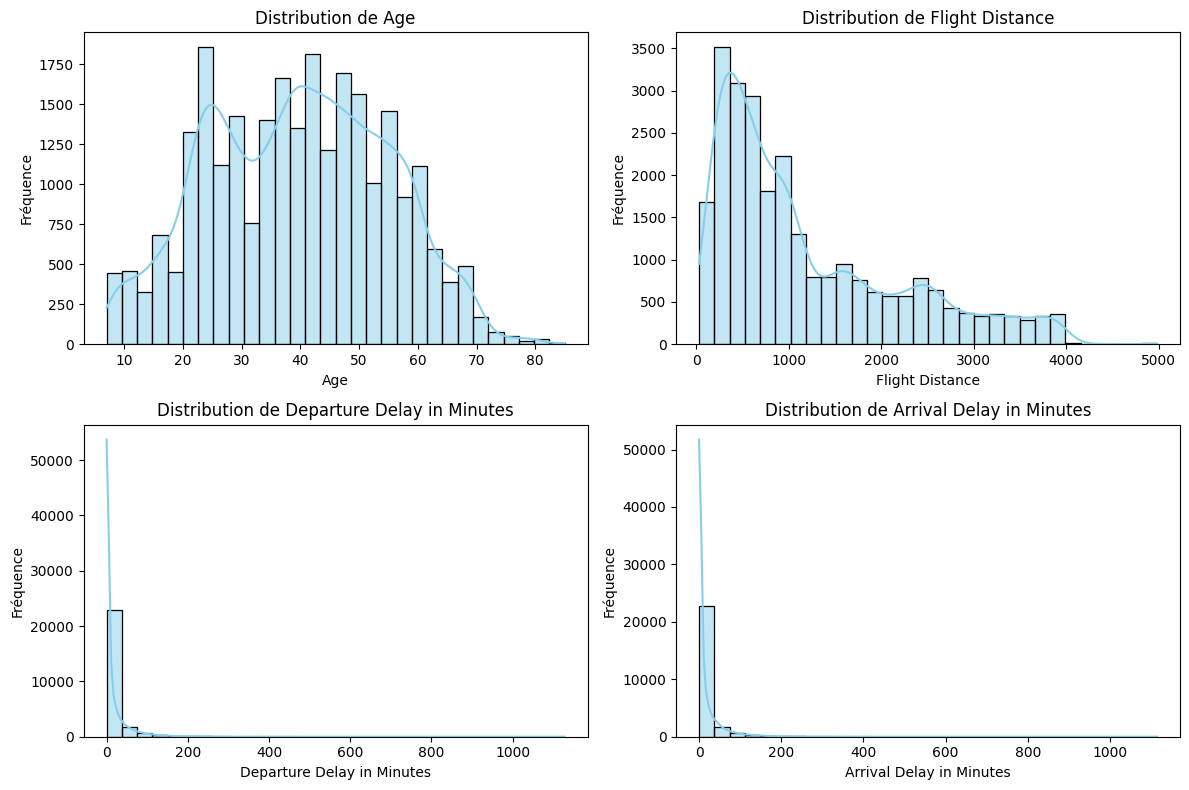

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de variables à visualiser
vars_hist = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Taille des figures
plt.figure(figsize=(12, 8))

# Plot
for i, var in enumerate(vars_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df_clean, x=var, kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


## Analyse des variables continues

| Variable               | Forme de distribution         | Observation clé |
|------------------------|-------------------------------|------------------|
| Age                    | Multimodale, assez symétrique | Deux pics vers 25 et 45 ans |
| Flight Distance        | Asymétrique à droite          | La majorité des vols font moins de 1000 km |
| Departure Delay (min)  | Fortement asymétrique         | La plupart des vols sont à l'heure ou peu retardés |
| Arrival Delay (min)    | Fortement asymétrique         | Même constat qu'au départ, avec quelques valeurs extrêmes |

### Conclusions possibles

- `Flight Distance` pourrait influencer le type de service reçu → potentiellement lié à la satisfaction.
- Les retards sont rares mais parfois extrêmes → à considérer dans des analyses comme l'ACP ou le clustering.
- L’`Age` peut jouer un rôle dans le type de service préféré ou la satisfaction → à explorer avec des boxplots ou des analyses groupées.


<ipython-input-12-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-12-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-12-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-12-5c35dbcc3b72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

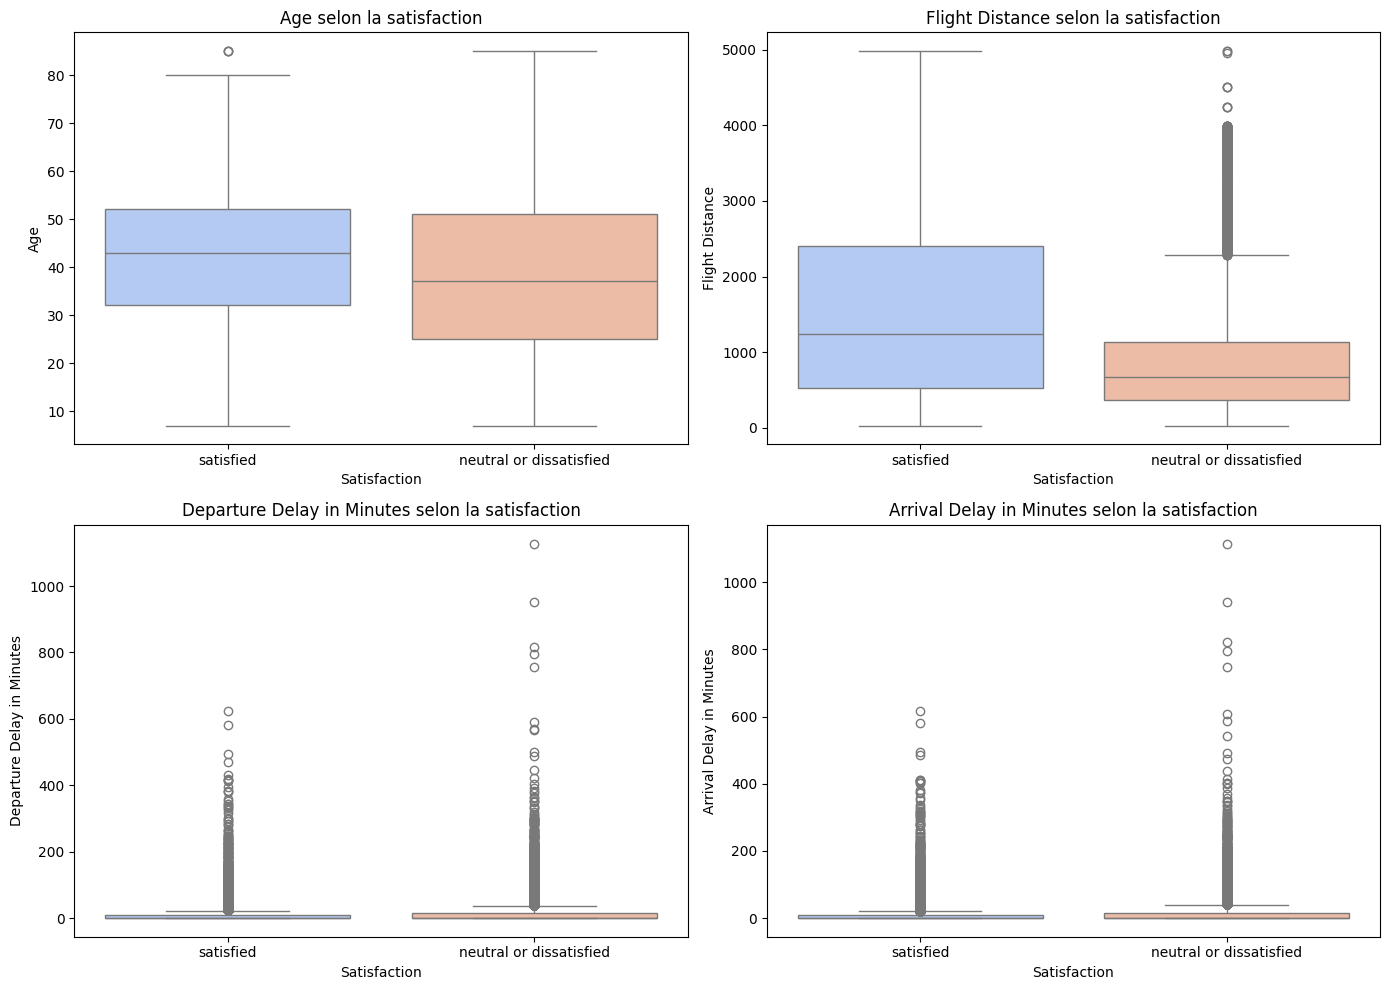

In [12]:
vars_box = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

plt.figure(figsize=(14, 10))

for i, var in enumerate(vars_box):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
    plt.title(f"{var} selon la satisfaction")
    plt.xlabel("Satisfaction")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Analyse : Influence potentielle sur la satisfaction

| Variable             | Influence potentielle sur la satisfaction |
|----------------------|--------------------------------------------|
| Âge                  | Peu d’influence directe visible, profils d’âge assez similaires |
| Flight Distance      | Corrélé à la satisfaction : les vols plus longs sont associés à une satisfaction plus élevée |
| Départ en retard     | Les valeurs extrêmes (outliers) sont plus fréquentes chez les clients insatisfaits |
| Arrivée en retard    | Même constat : les gros retards sont souvent une source d’insatisfaction |


<ipython-input-14-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-14-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-14-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
<ipython-input-14-3508595e0486>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

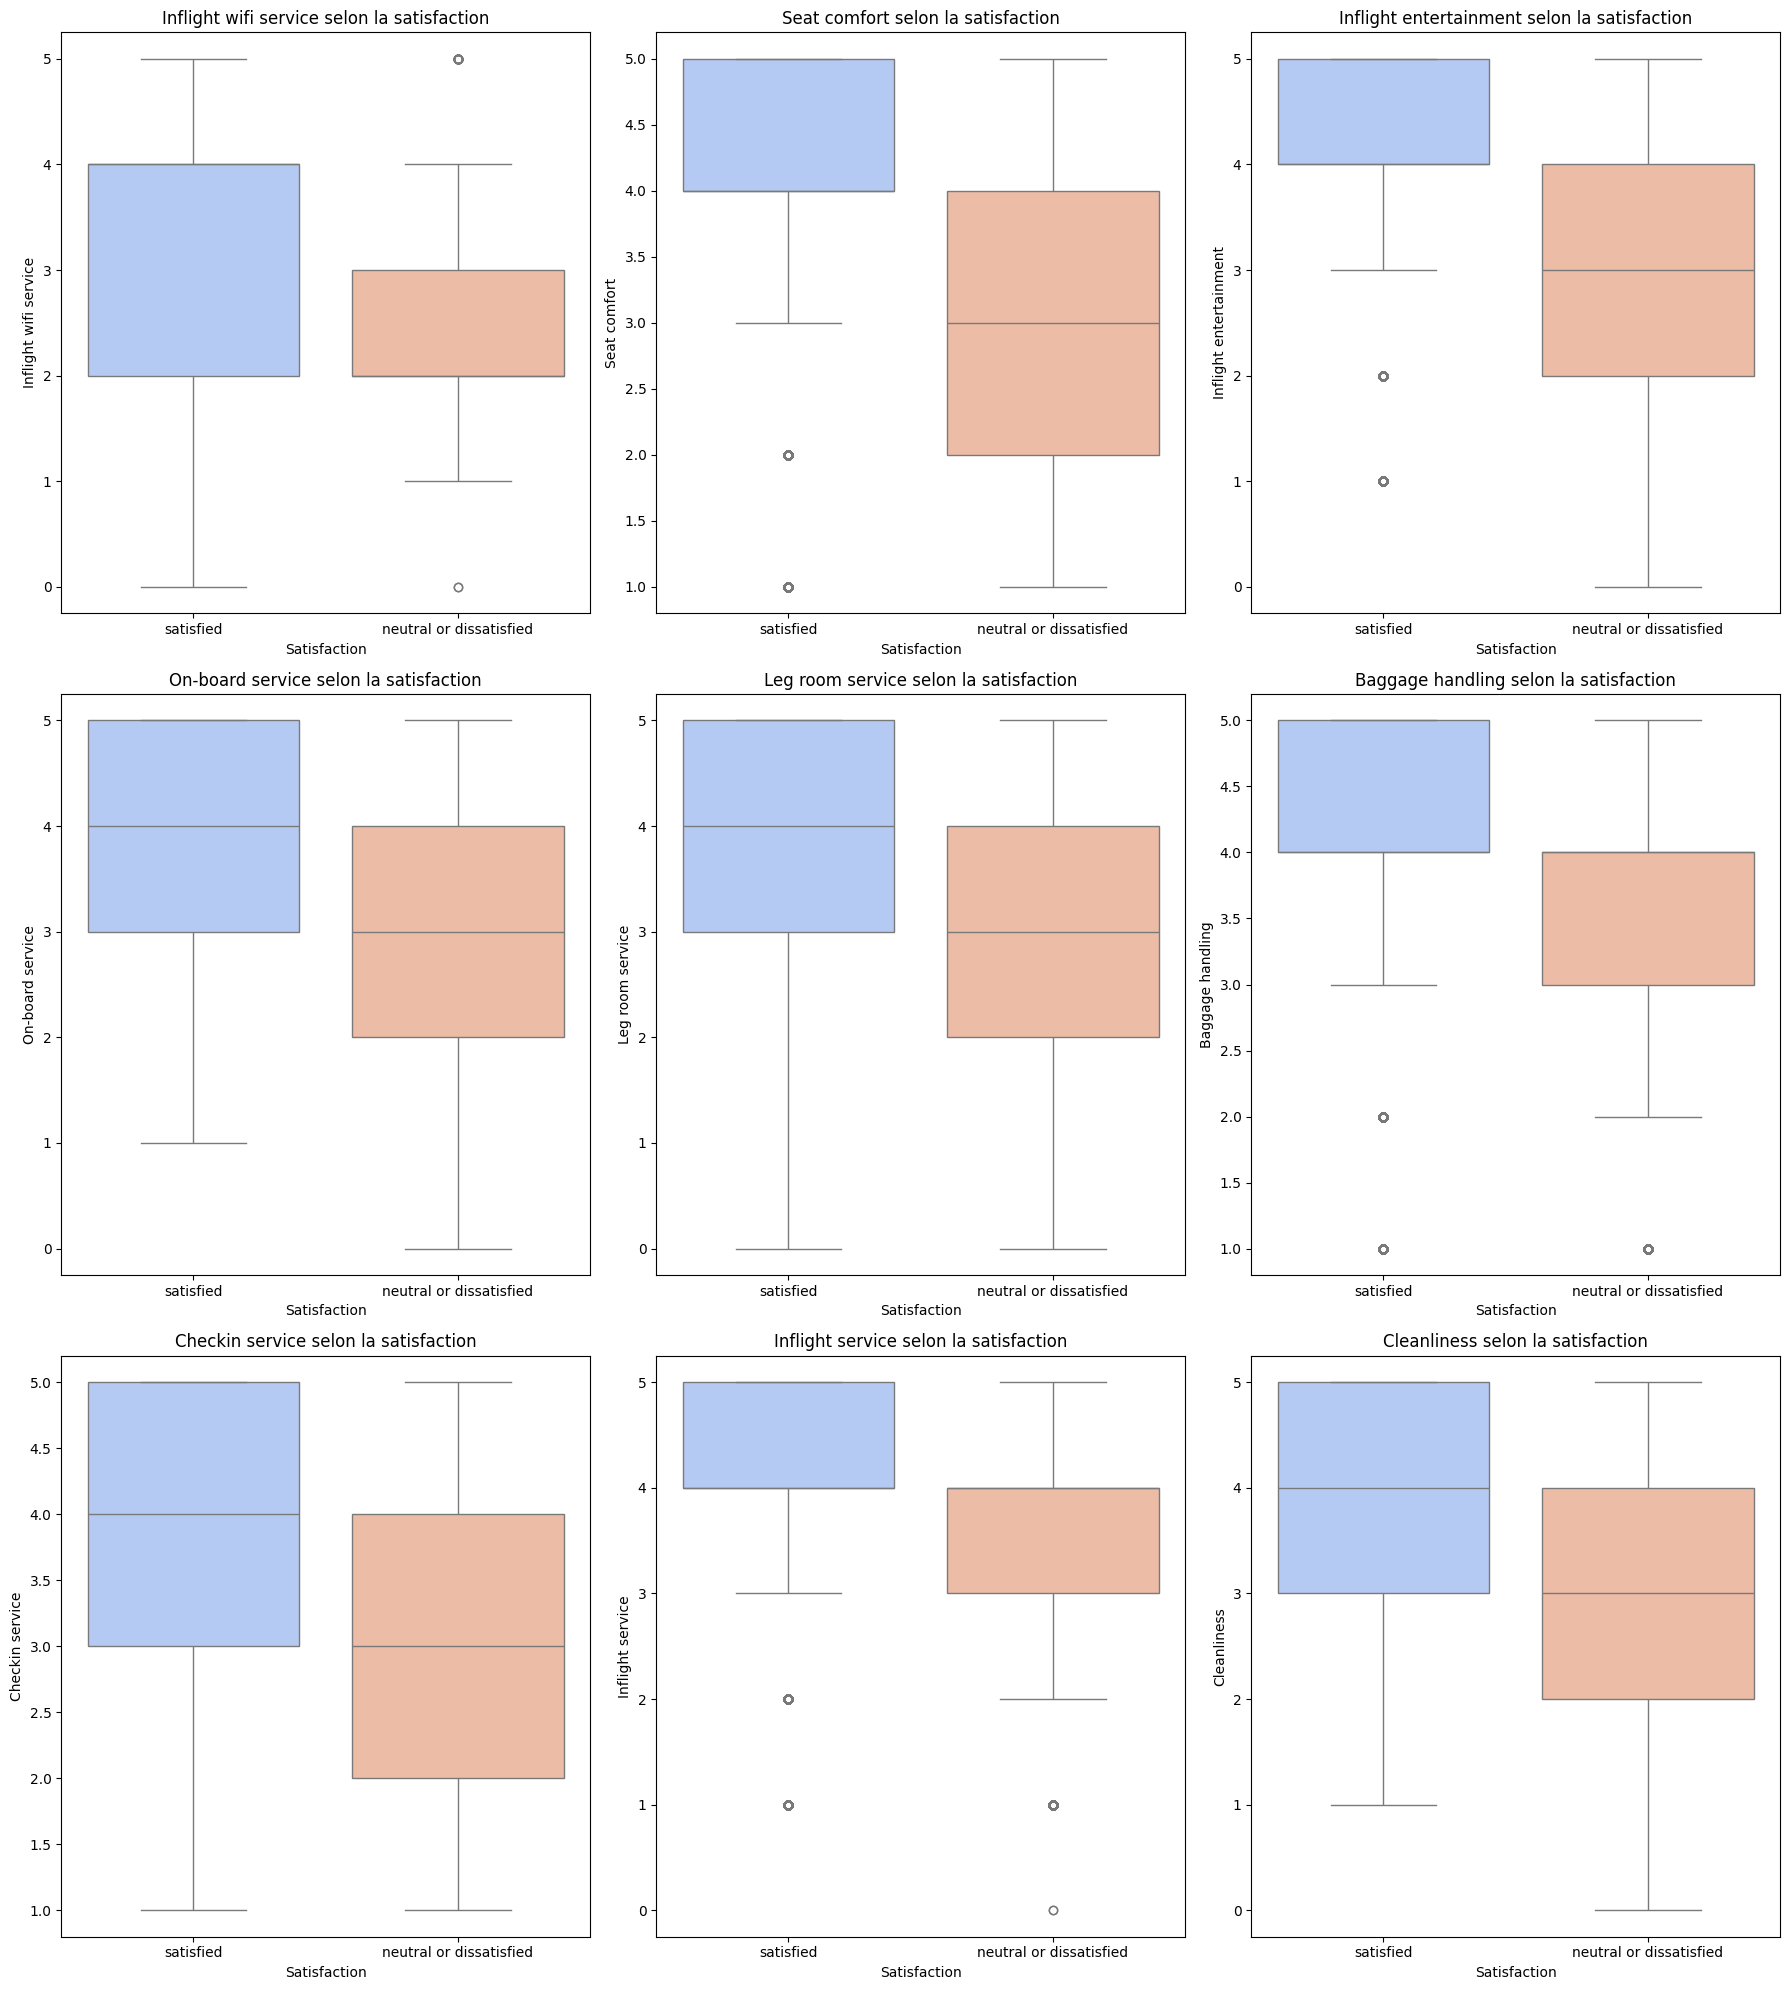

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables de service à visualiser
service_vars = [
    "Inflight wifi service",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Taille de la figure globale
plt.figure(figsize=(18, 20))

# Générer un boxplot pour chaque variable
for i, var in enumerate(service_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_clean, x="satisfaction", y=var, palette="coolwarm")
    plt.title(f"{var} selon la satisfaction")
    plt.xlabel("Satisfaction")
    plt.ylabel(var)

plt.tight_layout()
plt.show()
